# Visualizations with pandas
In this notebook, I am practicing creating visualizations with pandas functionality, as data visualization is part of data analysis and works in conjunction with data aggregation and filtering. Moreover, before analyzing data, it needs to be cleaned, which is what I will do.

0.I will start from the import of matplotlib.pyplot, seaborn та pandas.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

## Data set Taxis

Using the load_dataset method from the seaborn library, I will load the first dataset for analysis. I load the data in this way because it is convenient.
The dataset contains taxi trips in New York City in 2019. Reference (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

The dataset columns are as follows:

pickup - pickup time
dropoff - dropoff time
passengers - number of passengers on the trip
distance - trip distance
fare - base fare for the trip
tip - tip amount
tolls - tolls amount (also paid by the passenger)
total - total fare for the trip
color - color of the taxi that made the trip
payment - payment method
pickup_zone - zone where the trip started
dropoff_zone - zone where the trip ended
pickup_borough - borough where the trip started
dropoff_borough - borough where the trip ended

I will work with a piece of data available in seaborn itself.

In [2]:
df_taxi = sns.load_dataset('taxis')

1. Now I will display:
- the first 3 records from the dataset
- data types in the dataset df_taxi
- the dimensions of the dataset

In [9]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

2.Let's check if there are missing values in this dataset.

In [11]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

I will display the rows where the column with the most missing values (or one of those with the maximum number of missing values) has missing values. 

In [12]:
max_missing_col = df_taxi.isna().sum().idxmax()
rows_with_max_missing = df_taxi[df_taxi[max_missing_col].isna()]
print(rows_with_max_missing)

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00   80.0   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3      0.00  120.0   
711  2019-03-21 17:39:50 2019-03-21 18:12:54           2      1.74   17.0   
739  2019-03-14 00:09:17 2019-03-14 00:09:21           1      0.03    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2      0.00   45.0   
1108 2019-03-10 09:33:13 2019-03-10 09:52:04           1     13.40   52.0   
1112 2019-03-12 19:09:23 2019-03-12 19:20:46           1      0.90    8.5   
1230 2019-03-29 07:52:46 2019-03-29 08:02:40           1      0.90    5.5   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1      0.00   72.0   
1787 2019-03-28 06:58:57 2019-03-28 07:18:10           1      6.32   20.5   
2089 2019-03-12 16:21:28 2019-03-12 16:43:40           1      5.69   21.0   
2137 2019-03-08 13:27:32 2019-03-08 13:46:23           1      1.40   12.0   

In my opinion, the missing data regarding the pickup and dropoff zones and boroughs in the taxi dataset could be due to several reasons. Firstly, the absence of data in these columns might indicate that the trip was canceled before the passenger was picked up or that there was an error in recording the pickup and dropoff locations. This could be supported by cases where the distance is zero but the total fare is not zero, suggesting that the trip might have been canceled after the car was dispatched, resulting in charges for pickup and cancellation.

Furthermore, the presence of non-zero values in the distance and total columns, combined with missing values in the pickup and dropoff zones, could be attributed to discrepancies or errors in the location data lookup table https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page . For example, the NaN|N/A entries in the taxi_zone_lookup file might indicate missing or incorrect data for certain zones, leading to inconsistencies in the dataset.

Overall, these observations suggest potential data quality issues or anomalies that may require further investigation and data cleaning to ensure the accuracy and reliability of the analysis.

3.Let's fill in the missing values. Since all columns in the dataset have missing values in rows with string data type, I'll fill these missing values with the string 'NA'.
Also I'll create a new dataset df_taxi_clean, which contains the data from df_taxi with missing values filled in all columns (where those values are missing) with the value 'NA'.

In [13]:
df_taxi_clean = df_taxi.fillna('NA')

In [14]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4.I'd like to see the data over time. I'll convert the pickup column in the df_taxi_clean dataset to the datetime64[ns] format.
If the pickup column is already in the datetime64[ns] format when I load the dataset, I can skip this task, or I can try writing a function to perform the transformation anyway.

In [15]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'], errors='coerce')

print(df_taxi_clean.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [16]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

5.I currently have the pickup column containing datetime data. Let's remove the time and analyze the data by days.

In [17]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

Now I'll group the data by pickup_day and plot the sum of payments per day.

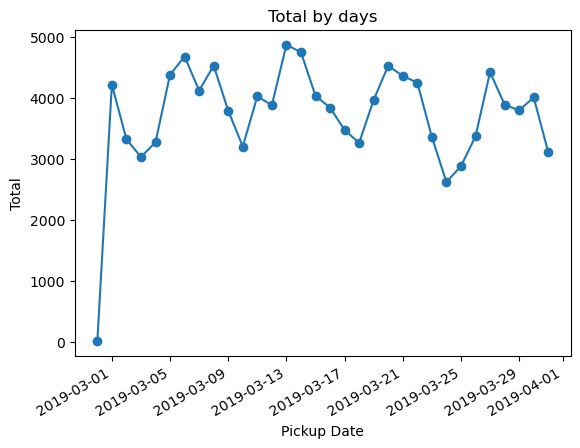

In [19]:
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
daily_payment.plot(x_compat=True, marker='o', linestyle='-')
plt.title('Total by days')
plt.xlabel('Pickup Date')
plt.ylabel('Total')
plt.show()

Based on the graph, it's evident that the best overall payments were received on Fridays. Additionally, higher payment figures are also observed on weekends and Mondays. From Tuesday to Thursday, we have the lowest payment figures. This indicates more and less profitable days of the week for the company. It's worth noting the exceptionally low figure just before March (February 28, 2019).

6. Now I will display the number of rows for each pickup_day.

In [21]:
count_per_day = df_taxi_clean['pickup_day'].value_counts()
count_per_day

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

There is only one row for the date 2019-02-28. This entry seems to have ended up here accidentally. I'll delete the row containing pickup_day equal to 2019-02-28 from the df_taxi_clean dataset and plot the total payments by pickup_day again.

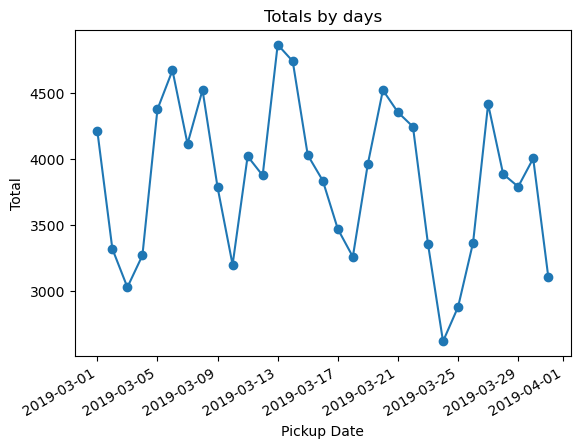

In [22]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
daily_payment.plot(x_compat=True, marker='o', linestyle='-')
plt.title('Totals by days')
plt.xlabel('Pickup Date')
plt.ylabel('Total')
plt.show()

7.Let's look at the dynamics of total payments by boroughs. To do this, I'll create a pivot table based on df_taxi_clean, where the rows represent pickup_day, the columns represent pickup_borough, and the values represent the sum of payments. I'll save this pivot table into a variable called borough_pivot. Finally, I'll remove the column with pickup_borough equal to NA - let's assume that these data are not relevant to us.

In [23]:
borough_pivot = pd.pivot_table(df_taxi_clean, values='total', index='pickup_day', columns='pickup_borough', aggfunc='sum')
borough_pivot.drop(columns='NA', inplace=True, errors='ignore')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


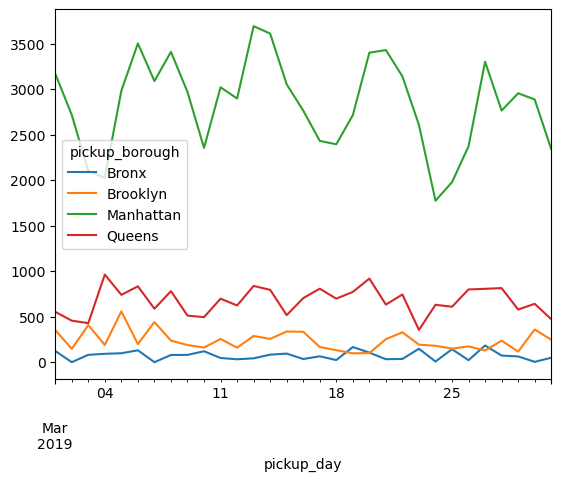

In [24]:
borough_pivot.fillna(0).plot();

Here we see, that the most often the highest sum of daily taxi payments is in Manhattan.

To plot histograms of the sum of daily taxi payments for each borough, I'll use the borough_pivot DataFrame and plot each histogram separately or all together.

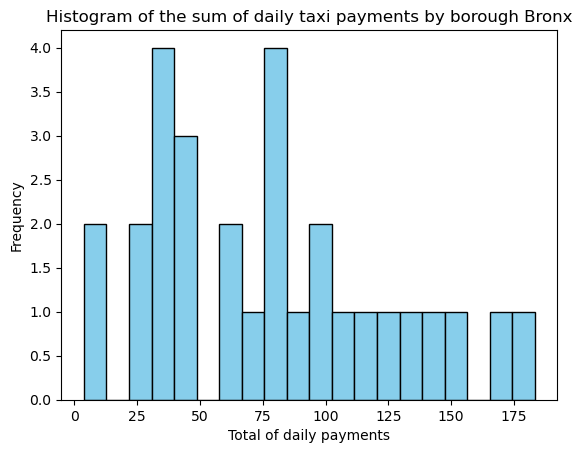

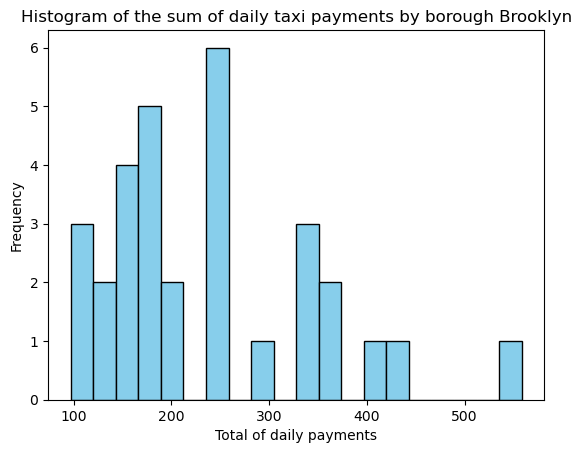

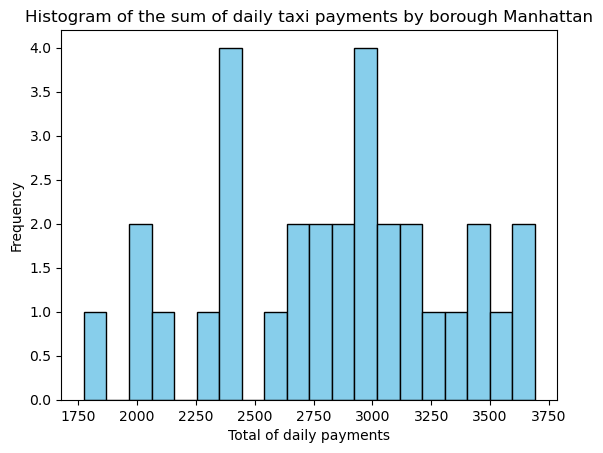

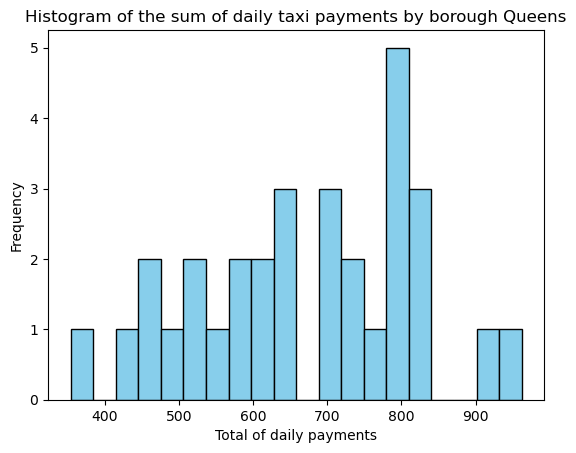

In [25]:
for column in borough_pivot.columns:
    borough_pivot[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of the sum of daily taxi payments by borough {column}')
    plt.xlabel('Total of daily payments')
    plt.ylabel('Frequency')
    plt.show()

9. Now we see that in some histograms, we have different ranges of checks. Suppose we want to compare the distributions of daily payment amounts by boroughs. I'll display 4 histograms on one figure.

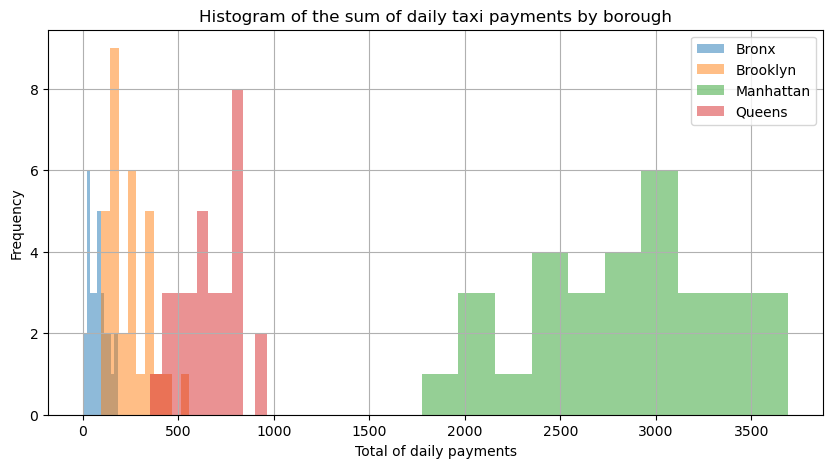

In [26]:
plt.figure(figsize=(10, 5))

for column in borough_pivot.columns:
    plt.hist(borough_pivot[column], bins=10, alpha=0.5, label=column)

plt.title('Histogram of the sum of daily taxi payments by borough')
plt.xlabel('Total of daily payments')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Here is also another option to visualize same data.

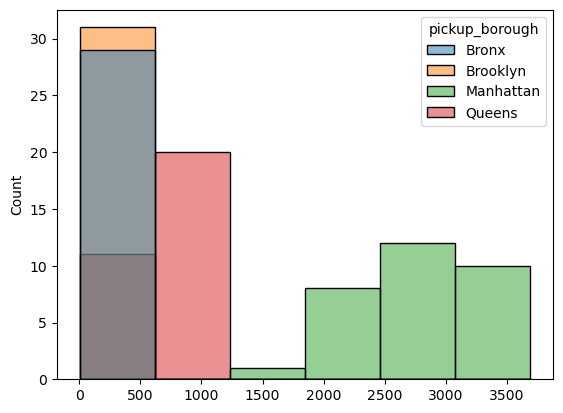

In [27]:
sns.histplot(data=borough_pivot, bins=6);

10. Using seaborn I will display histograms of the total monthly payments by car color (column color). There should be one histogram for each different car color in the dataset, all on one figure.

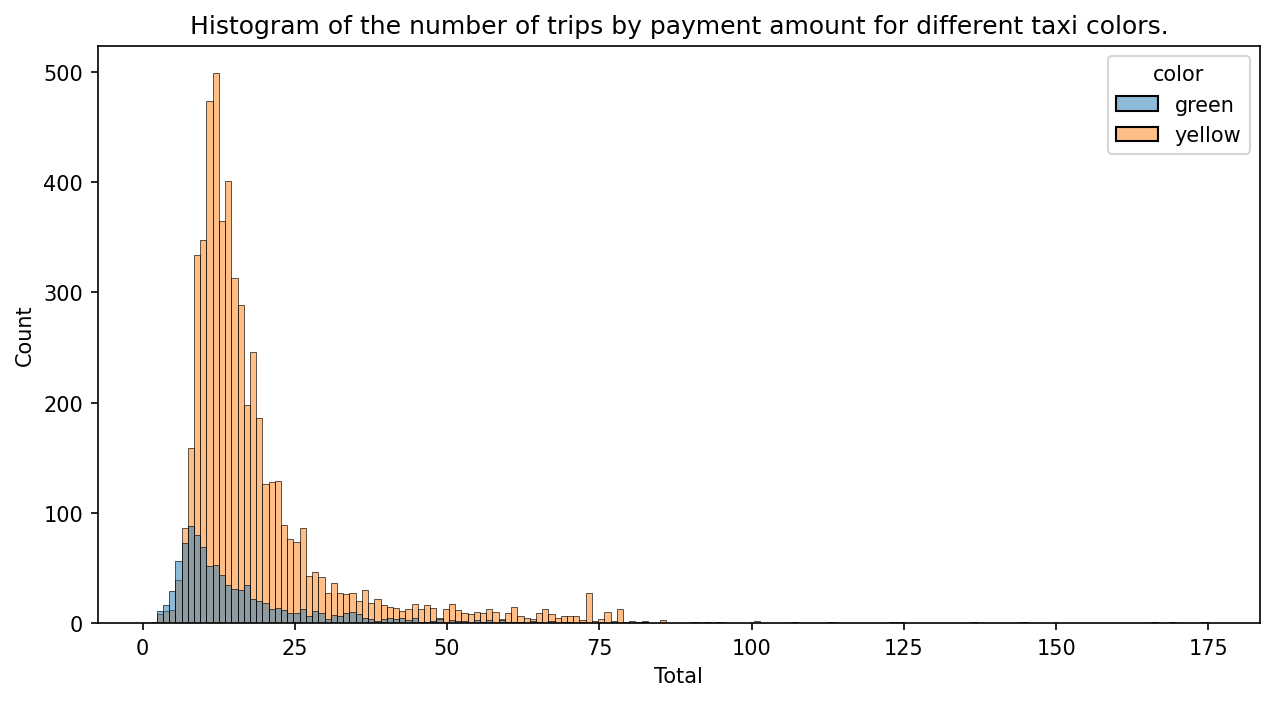

In [30]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'));
plt.title('Histogram of the number of trips by payment amount for different taxi colors.')
plt.xlabel('Total')
plt.ylabel('Count')
plt.show()

11. It's interesting to explore if there's any relationship between the trip distance and the tip amount. Let's create a scatter plot of the trip distance against the tip amount.

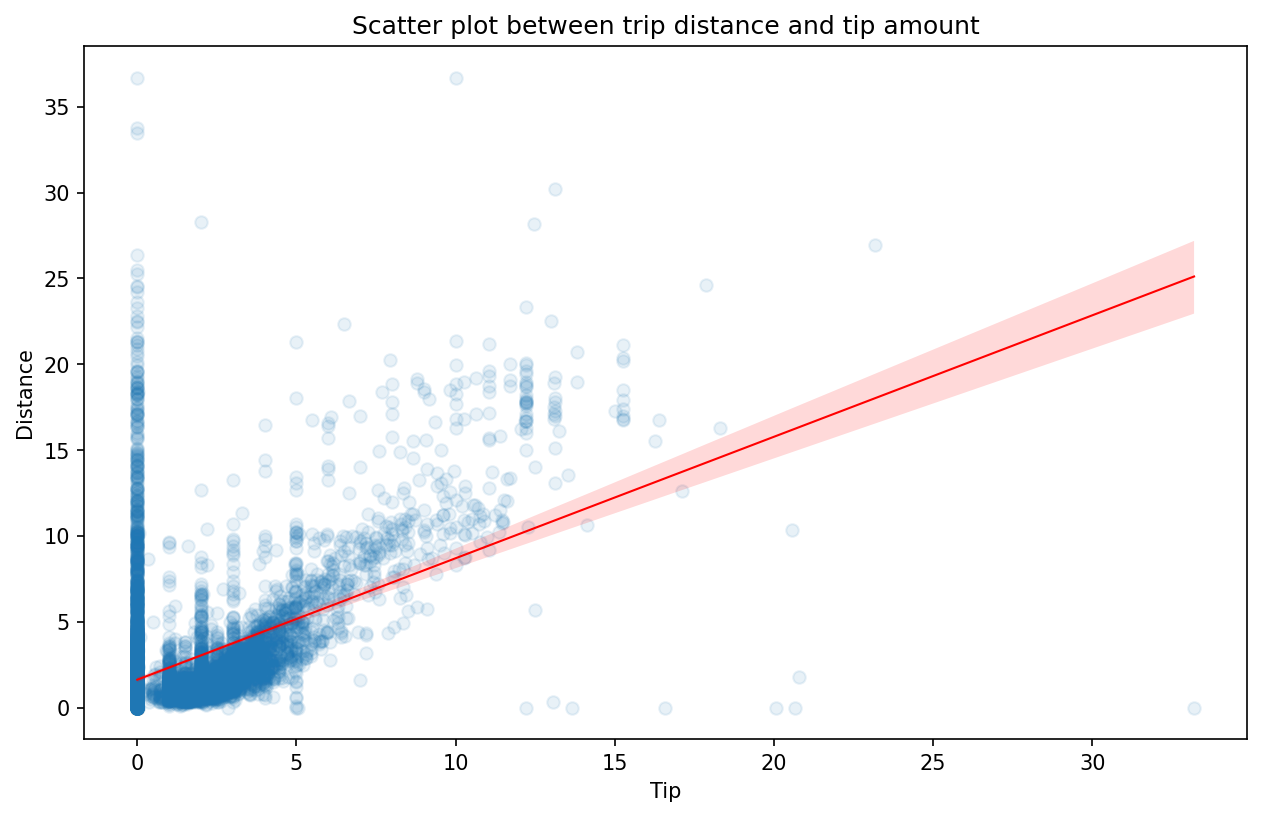

In [33]:
plt.figure(figsize=(10, 6), dpi=150)
sns.regplot(x='tip', y='distance', data=df_taxi_clean, line_kws={'color':'red', 'lw':'1'}, scatter_kws={'alpha': 0.1});
plt.title('Scatter plot between trip distance and tip amount')
plt.xlabel('Tip')
plt.ylabel('Distance')
plt.show()

12. The straight line of points parallel to the distance axis represents trips with no tips across different distances. We observe that even the longest trips can have no tips.

13. Let's start by plotting the daily dynamics of tips by pickup borough. I will use a line plot where each line represents a pickup borough, and the x-axis represents the date, while the y-axis represents the average tip amount. I'll exclude the borough labeled as NA from the plot.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_35824\830480902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pickup_day'] = pd.to_datetime(df_filtered['pickup_day'])


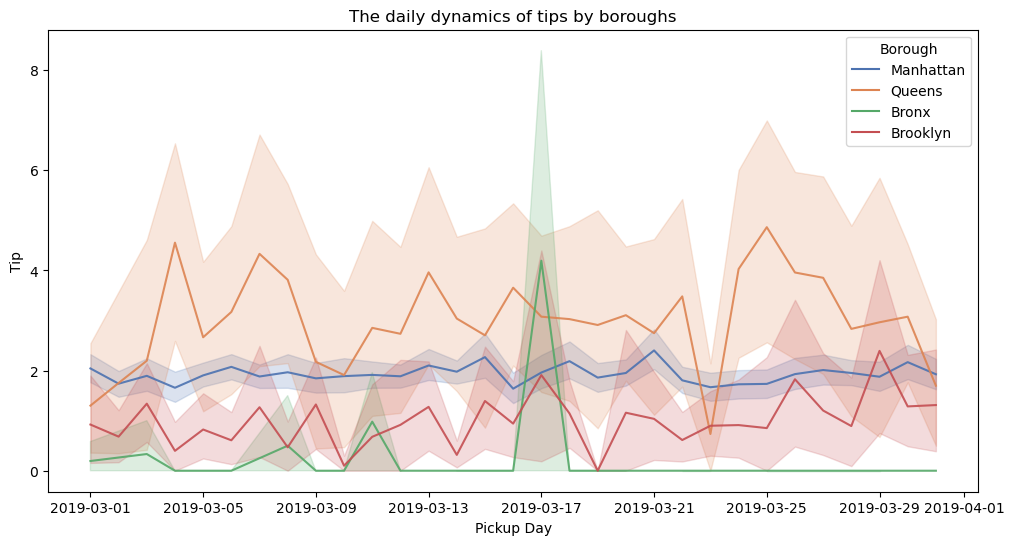

In [35]:
df_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
df_filtered['pickup_day'] = pd.to_datetime(df_filtered['pickup_day'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='pickup_day', y='tip', hue='pickup_borough', alpha=0.9, palette='deep')
plt.legend(title='Borough')
plt.title('The daily dynamics of tips by boroughs')
plt.xlabel('Pickup Day')
plt.ylabel('Tip')
plt.show()

Here are some conclusions on received visualization:
When starting a trip, which borough has the lowest average tip size? - Bronx
And which borough has the highest average tip size for trips? - Queens
For trips originating from which borough is the tip size the most stable (changing the least from day to day)? - Manhattan

14. Now I'll build a box plot of tip size by pickup borough (all boroughs except 'NA' pickups).

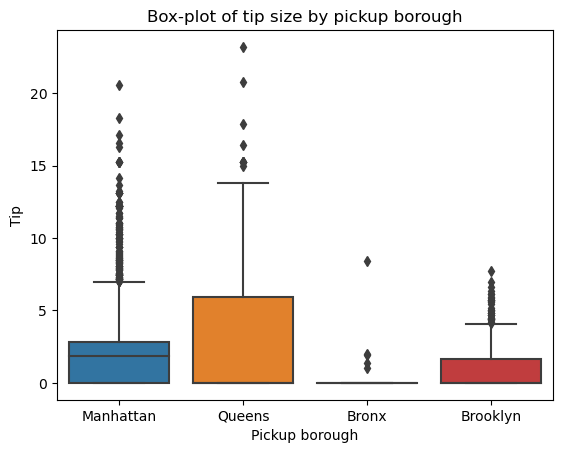

In [37]:
sns.boxplot(x='pickup_borough', y='tip', data=df_filtered)
plt.title('Box-plot of tip size by pickup borough')
plt.xlabel('Pickup borough')
plt.ylabel('Tip')
plt.show()

15. Additionally, I'll create several more visualizations. The first one will be dedicated to the distribution of tips for a specific number of passengers.

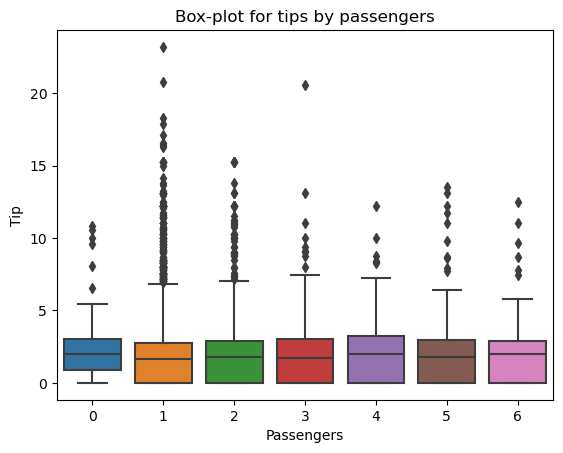

In [38]:
sns.boxplot(x='passengers', y='tip', data=df_filtered)
plt.title('Box-plot for tips by passengers')
plt.xlabel('Passengers')
plt.ylabel('Tip')
plt.show()

As we can see, a greater number of passengers does not necessarily mean a higher tip amount, so drivers may be even more interested in transporting just one passenger.

16. Now I will check dependency of passengers to total.

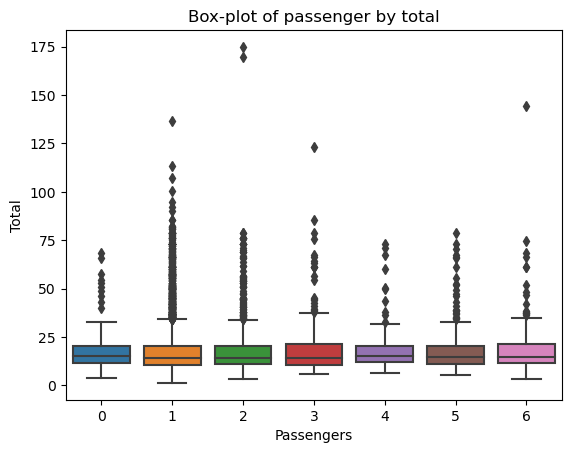

In [39]:
sns.boxplot(x='passengers', y='total', data=df_filtered)
plt.title('Box-plot of passenger by total')
plt.xlabel('Passengers')
plt.ylabel('Total')
plt.show()

At the same time, analyzing income based on the number of passengers reveals that trips with 1 to 3 passengers are more profitable for the company, while services for 4 passengers are the least profitable. This may affect the number of available vehicles.

17. Let's check dependency between number of trips and number of passengers, to know which options happen more often.

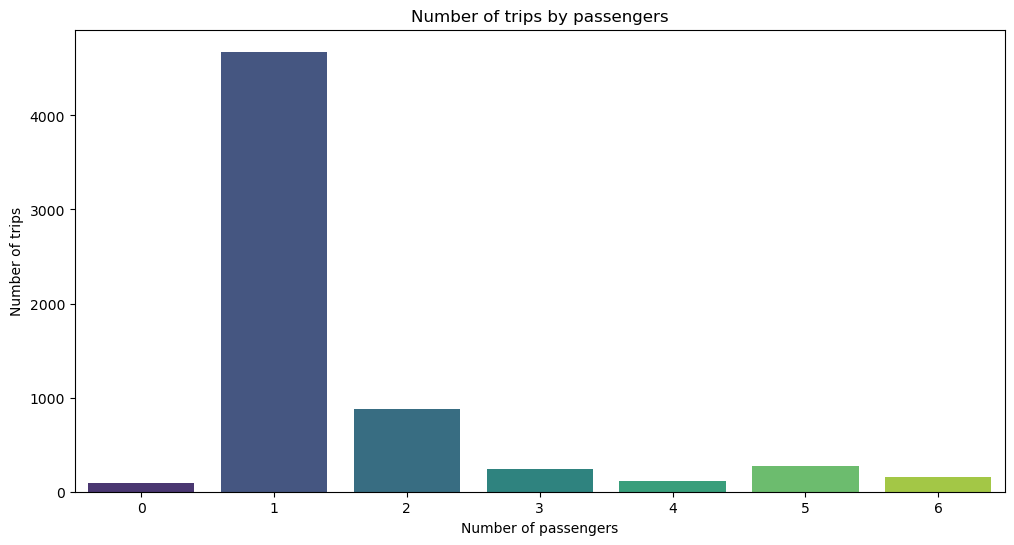

In [40]:
df_passenger_count = df_taxi_clean['passengers'].value_counts().reset_index()
df_passenger_count.columns = ['Passenger Count', 'Number of Trips']
plt.figure(figsize=(12, 6))
sns.barplot(data=df_passenger_count, x='Passenger Count', y='Number of Trips', palette='viridis')
plt.title('Number of trips by passengers')
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips')
plt.show()

Analyzing the number of trips based on different passenger counts, it's evident that trips with 1 passenger are the most frequent. In this case, the company might indeed be more interested in individual transportation and tailoring service features specifically to each customer.

Another interesting fact is the existence of trips with 0 passengers. They generate decent revenue and tips, so it would be intriguing to understand whether these trips are simply transporting goods or if they are data errors.

18. Now I would like to check dependency between total and disctance of trips

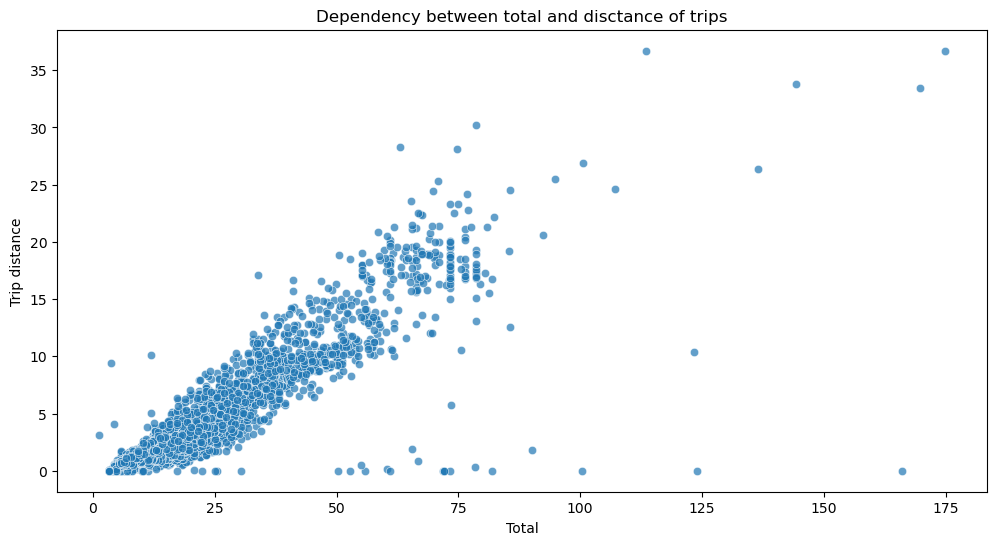

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_taxi_clean, x='total', y='distance', alpha=0.7)
plt.title('Dependency between total and disctance of trips')
plt.xlabel('Total')
plt.ylabel('Trip distance')
plt.show()

This graph illustrates the relationship between trip distance and total fare, showing a logical trend without significant deviations. The greater the distance, the higher the fare. We've already considered the exception regarding trips with a distance of 0 but a non-zero total fare. Additionally, we observe that most trips have a distance ranging from approximately 0 to 15 miles, with total fares ranging from 3 to 50.

19. Let's check which pickup borough has the highest base fare?

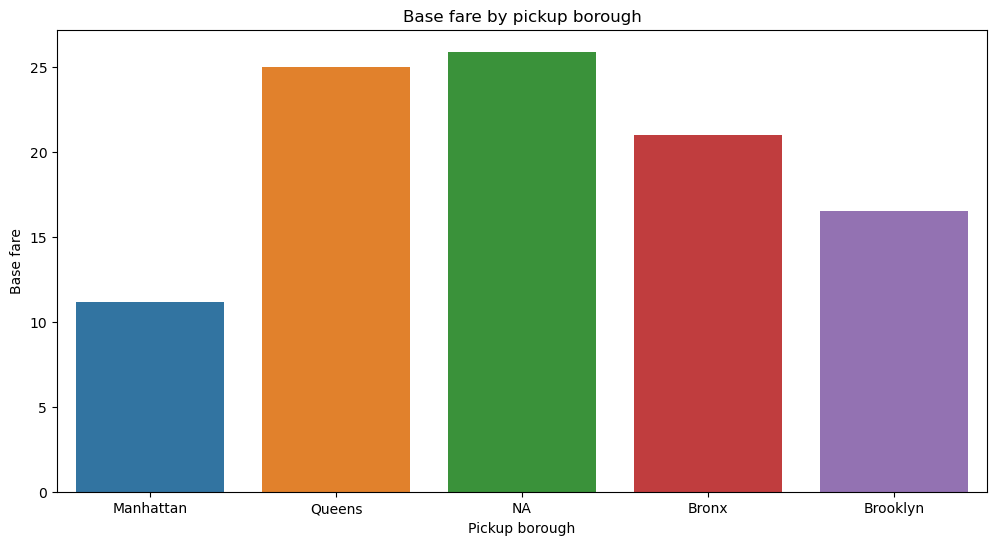

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taxi_clean, x='pickup_borough', y='fare', errorbar=None)
plt.title('Base fare by pickup borough')
plt.xlabel('Pickup borough')
plt.ylabel('Base fare')
plt.show()

As we see Queens emerges as the leader. However, a significant portion of the data does not include the borough, resulting in the loss of essential real-world insights.

20. Let's check the same for dropoff borough

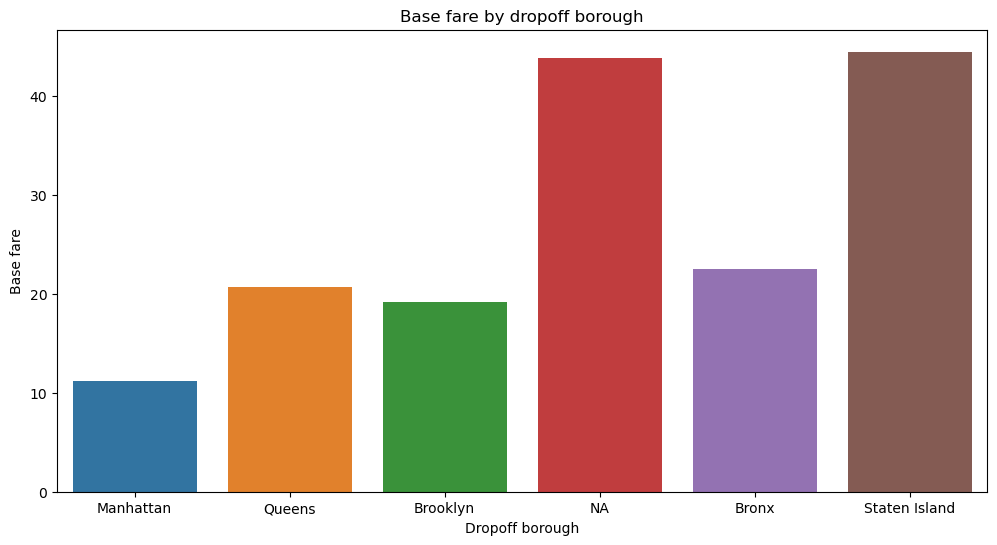

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taxi_clean, x='dropoff_borough', y='fare', errorbar=None)
plt.title('Base fare by dropoff borough')
plt.xlabel('Dropoff borough')
plt.ylabel('Base fare')
plt.show()

So the number of incorrect data entries is even higher. Additionally, a new location, Staten Island (which is not present in the pickup borough), has appeared. It's quite intriguing because it has the highest base fare, yet it's not encountered as an option in the pickup borough.